<a href="https://colab.research.google.com/github/gutiel2/Machine-Learning-Engineering/blob/main/MLE_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Mateo Gutierrez
RIN: 662006635
MLE - HW5
"""

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3160 - loss: 1.8540 - val_accuracy: 0.4822 - val_loss: 1.4241
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4906 - loss: 1.4132 - val_accuracy: 0.5131 - val_loss: 1.3223
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5467 - loss: 1.2632 - val_accuracy: 0.5677 - val_loss: 1.2144
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5954 - loss: 1.1469 - val_accuracy: 0.5987 - val_loss: 1.1235
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6220 - loss: 1.0683 - val_accuracy: 0.6051 - val_loss: 1.1195
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6470 - loss: 1.0088 - val_accuracy: 0.6387 - val_loss: 1.0170
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6620 - loss: 0.9536 - val_accuracy: 0.6533 - val_loss: 0.9907
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6849 - loss: 0.9014 - val_accuracy: 0.

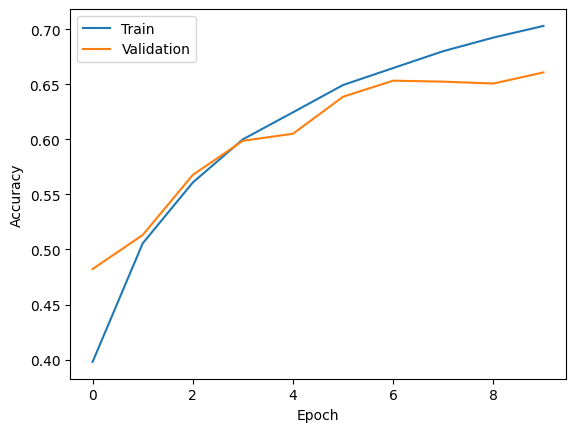

Train Accuracy: 0.7030199766159058
Validation Accuracy: 0.6607999801635742


In [3]:
# Question 1
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

model = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels),
    verbose=1
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]


print("Train Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)


In [6]:
# Question 2
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

data_bunch = load_breast_cancer()
X_full = data_bunch.data
y = data_bunch.target
feature_names = data_bunch.feature_names

X = X_full[:, [25, 26, 23]]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
svc_linear = SVC(kernel='linear', C=1.0)
svc_linear.fit(X_train, y_train)
accuracy_linear = svc_linear.score(X_test, y_test)

svc_rbf = SVC(kernel='rbf', C=2)
svc_rbf.fit(X_train, y_train)
accuracy_rbf = svc_rbf.score(X_test, y_test)

print("Linear Kernel Accuracy:", accuracy_linear)
print("RBF Kernel (C=2) Accuracy:", accuracy_rbf)


Linear Kernel Accuracy: 0.9649122807017544
RBF Kernel (C=2) Accuracy: 0.9473684210526315
